In [1]:
import numpy as np, pandas as pd, re, joblib, matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.utils import shuffle
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer

In [2]:
file_path = "train_cleaned.csv"
df = pd.read_csv(file_path)
df.head()

,Customer_ID,Month,Age,Occupation,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,CUS_0xd40,January,23,Scientist,1824.843333,3,4,3,4,Auto Loan,...,Unknown,809.98,26.822620,0.0,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good
1,CUS_0xd40,February,23,Scientist,1824.843333,3,4,3,4,Auto Loan,...,Good,809.98,31.944960,0.0,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,Good
2,CUS_0xd40,March,-500,Scientist,1824.843333,3,4,3,4,Auto Loan,...,Good,809.98,28.609352,0.0,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,Good
3,CUS_0xd40,April,23,Scientist,1824.843333,3,4,3,4,Auto Loan,...,Good,809.98,31.377862,0.0,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good
4,CUS_0xd40,May,23,Scientist,1824.843333,3,4,3,4,Auto Loan,...,Good,809.98,24.797347,0.0,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good


In [3]:
df = df.drop(columns=['Customer_ID', 'Month', 'Occupation', 'Type_of_Loan', 'Credit_Utilization_Ratio'], axis=1)
df.head()

,Age,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,23,1824.843333,3,4,3,4,3,7.0,11.27,4.0,Unknown,809.98,0.0,No,49.574949,80.415295,High_spent_Small_value_payments,312.494089,Good
1,23,1824.843333,3,4,3,4,-1,6.5,11.27,4.0,Good,809.98,0.0,No,49.574949,118.280222,Low_spent_Large_value_payments,284.629162,Good
2,-500,1824.843333,3,4,3,4,3,7.0,11.27,4.0,Good,809.98,0.0,No,49.574949,81.699521,Low_spent_Medium_value_payments,331.209863,Good
3,23,1824.843333,3,4,3,4,5,4.0,6.27,4.0,Good,809.98,0.0,No,49.574949,199.458074,Low_spent_Small_value_payments,223.451310,Good
4,23,1824.843333,3,4,3,4,6,6.5,11.27,4.0,Good,809.98,0.0,No,49.574949,41.420153,High_spent_Medium_value_payments,341.489231,Good


In [4]:
train_df, test_df = train_test_split(df, test_size=0.05, random_state=42, shuffle=True)
train_df.reset_index(drop=True, inplace=True)
test_df.reset_index(drop=True, inplace=True)
 
print(train_df.shape)
print(test_df.shape)

(95000, 19)
(5000, 19)


In [5]:
train_df.Credit_Score.value_counts()

Credit_Score
Standard    50525
Poor        27539
Good        16936
Name: count, dtype: int64

In [6]:
df_majority_1 = train_df[(train_df.Credit_Score == "Standard")]
df_majority_2 = train_df[(train_df.Credit_Score == "Poor")]
df_minority = train_df[(train_df.Credit_Score == "Good")]

In [7]:
df_majority_1_undersampled = resample(df_majority_1, n_samples=16936, random_state=42)
df_majority_2_undersampled = resample(df_majority_2, n_samples=16936, random_state=42)

print(df_majority_1_undersampled.shape)
print(df_majority_2_undersampled.shape)

(16936, 19)
(16936, 19)


In [8]:
undersampled_train_df = pd.concat([df_minority, df_majority_1_undersampled]).reset_index(drop=True)
undersampled_train_df = pd.concat([undersampled_train_df, df_majority_2_undersampled]).reset_index(drop=True)
undersampled_train_df = shuffle(undersampled_train_df, random_state=42)
undersampled_train_df.reset_index(drop=True, inplace=True)
undersampled_train_df.sample(5)

,Age,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
29653,38,3211.530000,8,8,31,6,25,13.0,6.10,6.0,Unknown,2277.28,NaN,Yes,165.786105,135.256468,Unknown,280.110427,Poor
26403,25,7356.252500,7,3,12,2,7,17.0,16.36,2.0,Standard,1128.68,0.0,NM,100.415822,163.795433,High_spent_Large_value_payments,711.413995,Standard
47184,33,7125.255000,4,7,6,3,18,18.0,2.29,3.0,Good,146.68,0.0,No,161.405543,131.152189,High_spent_Medium_value_payments,669.967768,Good
28183,33,6161.795000,8,5,10,3,13,17.0,10.64,3.0,Good,655.05,0.0,No,140.583478,568.767970,Low_spent_Medium_value_payments,186.828052,Good
12471,20,1383.084167,6,5,24,4,26,20.0,10.63,12.0,Bad,2173.67,0.0,Yes,50.872627,10000.000000,High_spent_Small_value_payments,311.059528,Poor


In [9]:
X_train = undersampled_train_df.drop(columns="Credit_Score", axis=1)
y_train = undersampled_train_df["Credit_Score"]
 
X_test = test_df.drop(columns="Credit_Score", axis=1)
y_test = test_df["Credit_Score"]

In [10]:
def scaling(features, df, df_test=None):
    if df_test is not None:
        df = df.copy()
        df_test = df_test.copy()
        
        for feature in features:
            scaler = MinMaxScaler()
            X = np.asanyarray(df[feature])
            X = X.reshape(-1,1)
            
            scaler.fit(X)
            
            df["{}".format(feature)] = scaler.transform(X)
            
            joblib.dump(scaler, "model/scaler_{}.joblib".format(feature))
            
            X_test = np.asanyarray(df_test[feature])
            X_test = X_test.reshape(-1,1)
            
            df_test["{}".format(feature)] = scaler.transform(X_test)
        
        return df, df_test
    else:
        df = df.copy()
        
        for feature in features:
            scaler = MinMaxScaler()
            X = np.asanyarray(df[feature])
            X = X.reshape(-1,1)
            
            scaler.fit(X)
            
            df["{}".format(feature)] = scaler.transform(X)
            
            joblib.dump(scaler, "model/scaler_{}.joblib".format(feature))
        
        return df
 
def encoding(features, df, df_test=None):
    if df_test is not None:
        df = df.copy()
        df_test = df_test.copy()
        
        for feature in features:
            encoder = LabelEncoder()
            
            encoder.fit(df[feature])
            
            df["{}".format(feature)] = encoder.transform(df[feature])
            
            joblib.dump(encoder, "model/encoder_{}.joblib".format(feature))
            
            df_test["{}".format(feature)] = encoder.transform(df_test[feature])
        
        return df, df_test
    else:
        df = df.copy()
        
        for feature in features:
            encoder = LabelEncoder()
            
            encoder.fit(df[feature])
            
            df["{}".format(feature)] = encoder.transform(df[feature])
            
            joblib.dump(encoder, "model/encoder_{}.joblib".format(feature))
        
        return df

In [11]:
numerical_columns = [
    'Age',
    'Monthly_Inhand_Salary',
    'Num_Bank_Accounts',
    'Num_Credit_Card',
    'Interest_Rate',
    'Num_of_Loan',
    'Delay_from_due_date',
    'Num_of_Delayed_Payment',
    'Changed_Credit_Limit',
    'Num_Credit_Inquiries',
    'Outstanding_Debt',
    'Total_EMI_per_month',
    'Amount_invested_monthly',
    'Monthly_Balance',
    'Credit_History_Age'
]
 
categorical_columns = [
    'Credit_Mix',
    'Payment_of_Min_Amount', 
    'Payment_Behaviour'
]
 
new_train_df, new_test_df = scaling(numerical_columns, X_train, X_test)
new_train_df, new_test_df = encoding(categorical_columns, new_train_df, new_test_df)

In [12]:
encoder = LabelEncoder()

encoder.fit(y_train)

new_y_train = encoder.transform(y_train)

joblib.dump(encoder, "model/encoder_target.joblib")
 
new_y_test = encoder.transform(y_test)

In [13]:
pca_numerical_columns_1 = [
    'Num_Bank_Accounts',
    'Num_Credit_Card',
    'Interest_Rate',
    'Num_of_Loan',
    'Delay_from_due_date',
    'Num_of_Delayed_Payment',
    'Changed_Credit_Limit',
    'Num_Credit_Inquiries',
    'Outstanding_Debt',
    'Credit_History_Age'
]
 
pca_numerical_columns_2 = [
    'Monthly_Inhand_Salary',
    'Monthly_Balance', 
    'Amount_invested_monthly', 
    'Total_EMI_per_month'
]

In [14]:
train_pca_df = new_train_df.copy().reset_index(drop=True)
test_pca_df = new_test_df.copy().reset_index(drop=True)

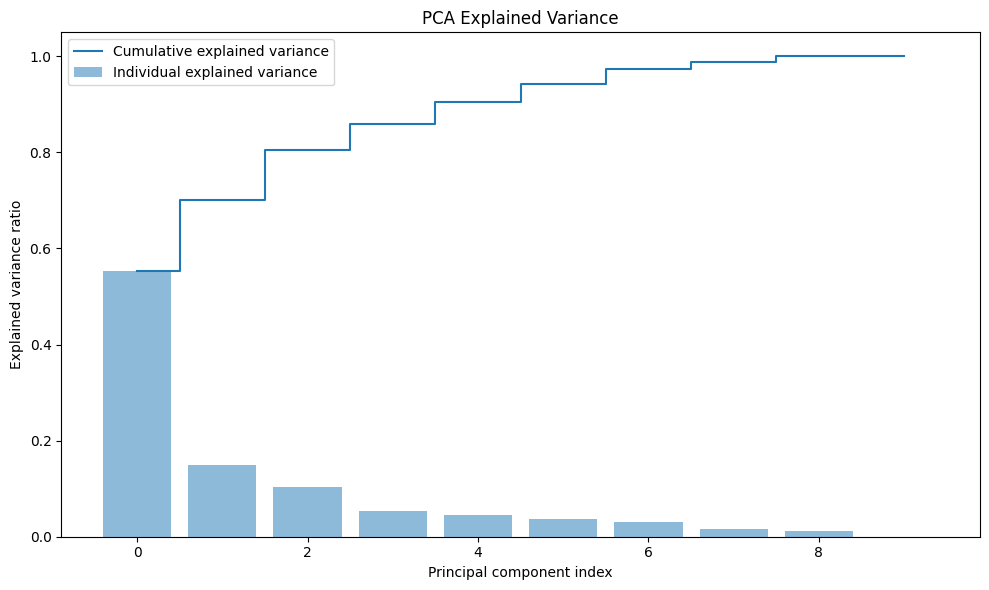

In [15]:
# Impute missing values using the mean
imputer = SimpleImputer(strategy='mean')
imputed_data = imputer.fit_transform(train_pca_df[pca_numerical_columns_1])

# Fit PCA
pca = PCA(n_components=len(pca_numerical_columns_1), random_state=123)
pca.fit(imputed_data)

# Transform data using PCA
princ_comp = pca.transform(imputed_data)

# Explained variance
var_exp = pca.explained_variance_ratio_.round(3)
cum_var_exp = np.cumsum(var_exp)

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(range(len(pca_numerical_columns_1)), var_exp, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(len(pca_numerical_columns_1)), cum_var_exp, where='mid', label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.title('PCA Explained Variance')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [16]:
# Step 1: Impute missing values with the mean
imputer = SimpleImputer(strategy='mean')
imputed_data = imputer.fit_transform(train_pca_df[pca_numerical_columns_1])

# Convert imputed data back to a DataFrame with the same column names
imputed_data_df = pd.DataFrame(imputed_data, columns=pca_numerical_columns_1)

# Step 2: Fit PCA
pca_1 = PCA(n_components=5, random_state=123)
pca_1.fit(imputed_data_df)  # Fit PCA on the DataFrame with column names

# Step 3: Save the trained PCA model
joblib.dump(pca_1, "model/pca_{}.joblib".format(1))

# Step 4: Transform the data using the fitted PCA
princ_comp_1 = pca_1.transform(imputed_data_df)  # Transform using the DataFrame

# Step 5: Add the principal components as new columns in the DataFrame
train_pca_df[["pc1_1", "pc1_2", "pc1_3", "pc1_4", "pc1_5"]] = pd.DataFrame(princ_comp_1, columns=["pc1_1", "pc1_2", "pc1_3", "pc1_4", "pc1_5"])

# Step 6: Drop the original numerical columns used for PCA
train_pca_df.drop(columns=pca_numerical_columns_1, axis=1, inplace=True)

# Show the updated DataFrame with the principal components
train_pca_df.head()

,Age,Monthly_Inhand_Salary,Credit_Mix,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,pc1_1,pc1_2,pc1_3,pc1_4,pc1_5
0,0.059041,0.237662,2,2,0.001916,0.004921,0,1.0,0.118207,-0.207936,-0.071317,-0.011112,-0.011479
1,0.056758,0.503576,1,1,0.001897,0.015700,0,1.0,-0.086771,-0.040306,-0.102706,-0.010973,-0.012582
2,0.057845,0.090128,1,1,0.000563,0.004190,3,1.0,-0.130446,-0.023771,0.041997,-0.010077,-0.011461
3,0.058062,0.126136,1,0,0.001031,0.004040,0,1.0,-0.272033,0.111239,-0.041558,-0.008782,-0.010762
4,0.057954,0.104396,1,1,0.000852,0.016205,5,1.0,-0.261675,0.185914,-0.012352,-0.010272,-0.010655


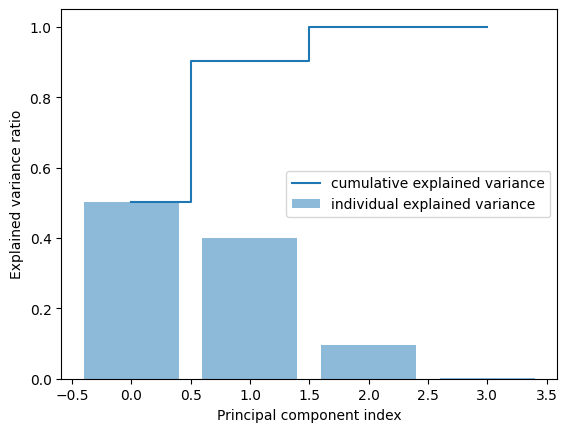

In [17]:
pca = PCA(n_components=len(pca_numerical_columns_2), random_state=123)

pca.fit(train_pca_df[pca_numerical_columns_2])

princ_comp = pca.transform(train_pca_df[pca_numerical_columns_2])
 
var_exp = pca.explained_variance_ratio_.round(3)
cum_var_exp = np.cumsum(var_exp)
 
plt.bar(range(len(pca_numerical_columns_2)), var_exp, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(len(pca_numerical_columns_2)), cum_var_exp, where='mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.show()

In [18]:
pca_2 = PCA(n_components=2, random_state=123)

pca_2.fit(train_pca_df[pca_numerical_columns_2])

joblib.dump(pca_2, "model/pca_{}.joblib".format(2))

princ_comp_2 = pca_2.transform(train_pca_df[pca_numerical_columns_2])
train_pca_df[["pc2_1", "pc2_2"]] = pd.DataFrame(princ_comp_2, columns=["pc2_1", "pc2_2"])
train_pca_df.drop(columns=pca_numerical_columns_2, axis=1, inplace=True)
train_pca_df.head()

,Age,Credit_Mix,Payment_of_Min_Amount,Payment_Behaviour,pc1_1,pc1_2,pc1_3,pc1_4,pc1_5,pc2_1,pc2_2
0,0.059041,2,2,0,0.118207,-0.207936,-0.071317,-0.011112,-0.011479,-0.049726,-0.045119
1,0.056758,1,1,0,-0.086771,-0.040306,-0.102706,-0.010973,-0.012582,0.207454,-0.113534
2,0.057845,1,1,3,-0.130446,-0.023771,0.041997,-0.010077,-0.011461,-0.190867,-0.002135
3,0.058062,1,0,0,-0.272033,0.111239,-0.041558,-0.008782,-0.010762,-0.156516,-0.012941
4,0.057954,1,1,5,-0.261675,0.185914,-0.012352,-0.010272,-0.010655,-0.173681,0.005115


In [19]:
# Step 1: Impute missing values in the test data (same strategy as in training)
test_imputed_data_1 = imputer.fit_transform(test_pca_df[pca_numerical_columns_1])

# Convert imputed test data to DataFrame with same column names as the training data
test_imputed_data_df_1 = pd.DataFrame(test_imputed_data_1, columns=pca_numerical_columns_1)

# Step 2: Transform the test data using the previously trained PCA model (pca_1)
test_princ_comp_1 = pca_1.transform(test_imputed_data_df_1)  # Use DataFrame with column names

# Step 3: Add the principal components from pca_1 as new columns in the test DataFrame
test_pca_df[["pc1_1", "pc1_2", "pc1_3", "pc1_4", "pc1_5"]] = pd.DataFrame(test_princ_comp_1, columns=["pc1_1", "pc1_2", "pc1_3", "pc1_4", "pc1_5"])

# Step 4: Drop the original numerical columns used for PCA (from pca_numerical_columns_1)
test_pca_df.drop(columns=pca_numerical_columns_1, axis=1, inplace=True)


# Step 5: Impute missing values in the test set for pca_numerical_columns_2 (same method for second PCA)
test_imputed_data_2 = imputer.fit_transform(test_pca_df[pca_numerical_columns_2])

# Convert imputed test data to DataFrame with same column names as the training data
test_imputed_data_df_2 = pd.DataFrame(test_imputed_data_2, columns=pca_numerical_columns_2)

# Step 6: Transform the test data using the second PCA model (pca_2)
test_princ_comp_2 = pca_2.transform(test_imputed_data_df_2)  # Use DataFrame with column names

# Step 7: Add the principal components from pca_2 as new columns in the test DataFrame
test_pca_df[["pc2_1", "pc2_2"]] = pd.DataFrame(test_princ_comp_2, columns=["pc2_1", "pc2_2"])

# Step 8: Drop the original numerical columns used for PCA (from pca_numerical_columns_2)
test_pca_df.drop(columns=pca_numerical_columns_2, axis=1, inplace=True)

# Show the updated DataFrame with the principal components
test_pca_df.head()

,Age,Credit_Mix,Payment_of_Min_Amount,Payment_Behaviour,pc1_1,pc1_2,pc1_3,pc1_4,pc1_5,pc2_1,pc2_2
0,0.057627,1,1,0,-0.077634,-0.131274,-0.038595,-0.011447,-0.010852,-0.059599,-0.041546
1,0.056323,0,2,5,0.557095,-0.438703,-0.185777,-0.013321,-0.010957,-0.212438,0.012524
2,0.058824,1,1,5,-0.217100,-0.079859,-0.153985,-0.010182,-0.014887,0.436414,-0.069450
3,0.058171,2,2,5,0.127189,-0.147821,-0.144298,-0.011539,-0.007905,-0.191095,0.000547
4,0.057301,1,1,1,-0.248671,-0.149269,-0.012416,-0.012584,-0.010091,0.185700,-0.111138


In [20]:
# Convert new_y_train (which is a numpy array) to a pandas Series
new_y_train_series = pd.Series(new_y_train)

# Concatenate the DataFrame with the Series (or DataFrame)
combined_df = pd.concat([train_pca_df, new_y_train_series], axis=1)

# Optionally, you can rename the new column for better clarity, e.g., "target"
combined_df.columns = list(train_pca_df.columns) + ['Credit_Score']

# Save the combined DataFrame to a CSV file
combined_df.to_csv("train_pca.csv", index=False)

In [21]:
# Convert new_y_test (which is a numpy array) to a pandas Series
new_y_test_series = pd.Series(new_y_test)

# Concatenate the DataFrame with the Series (or DataFrame)
combined_df_train = pd.concat([test_pca_df, new_y_test_series], axis=1)

# Optionally, you can rename the new column for better clarity, e.g., "target"
combined_df_train.columns = list(test_pca_df.columns) + ['Credit_Score']

# Save the combined DataFrame to a CSV file
combined_df_train.to_csv("test_pca.csv", index=False)

In [22]:
new_y_test = pd.DataFrame(new_y_test, columns=["Credit_Score"])
new_y_test

,Credit_Score
0,0
1,1
2,0
3,1
4,0
...,...
4995,0
4996,2
4997,2
4998,1
